In [82]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
0.80*0.80*0.2*0.8

0.10240000000000003

### Problem 1

In [47]:
def run_trial_problem_1():
    A = np.random.choice([True,False], p = [0.20,0.80])
    B = np.random.choice([True,False], p = [0.50,0.50])
    C = np.random.choice([True,False], p = [0.80,0.20])

    if A == False and B == False:
        D = np.random.choice([True,False], p = [0.90,0.10])
    elif A == False and B == True:
        D = np.random.choice([True,False], p = [0.60,0.40])
    elif A == True and B == False:
        D = np.random.choice([True,False], p = [0.50,0.50])
    elif A == True and B == True:
        D = np.random.choice([True,False], p = [0.10,0.90])

    if B == False and C == False:
        E = np.random.choice([True,False], p = [0.20,0.80])
    elif B == False and C == True:
        E = np.random.choice([True,False], p = [0.40,0.60])
    elif B == True and C == False:
        E = np.random.choice([True,False], p = [0.80,0.20])
    elif B == True and C == True:
        E = np.random.choice([True,False], p = [0.30,0.70])
        
    return A, B, C, D, E

In [48]:
probs = {"A":[],"B":[],"C":[],"D":[],"E":[]}
numerator = 0
denominator = 0

In [49]:
for _ in range(0,200_000):
    A, B, C, D, E = run_trial_problem_1()
    probs["A"].append(A)
    probs["B"].append(B)    
    probs["C"].append(C)    
    probs["D"].append(D)
    probs["E"].append(E)   

In [50]:
for a,b,c,d,e in zip(probs["A"],probs["B"],probs["C"],probs["D"],probs["E"]):
    if a == False and a == b and a == c and a == d and a == e:
        numerator += 1
    denominator += 1
numerator / denominator

0.00637

In [ ]:
path = ["hot","cold","cold","hot","cold","cold"]
trials = 0
outcomes = 0

while True:
    position = 0
    route = ["hot"]

    while len(route) < 6:
        position += np.random.choice([1,0], p = [0.80,0.20])
        route.append(path[position])

    if route[0] == 'hot' and route[1] == 'cold' and route[2] == 'cold':
        trials += 1
        if route[3] == 'hot' and route[4] == 'hot' and route[5] == 'cold':
            outcomes += 1

### Problem 2

In [ ]:
def run_trial_problem_2():
    B = np.random.choice([True,False], p = [0.001,0.999])
    E = np.random.choice([True,False], p = [0.002,0.998])

    if B == True and E == True:
        A = np.random.choice([True,False], p = [0.95,0.05])
    elif B == True and E == False:
        A = np.random.choice([True,False], p = [0.94,0.06])
    elif B == False and E == True:
        A = np.random.choice([True,False], p = [0.29,0.71])  
    elif B == False and E == False:
        A = np.random.choice([True,False], p = [0.001,0.999])

    if A == True:
        J = np.random.choice([True,False], p = [0.90,0.10])
        M = np.random.choice([True,False], p = [0.70,0.30])
    elif A == False:
        J = np.random.choice([True,False], p = [0.05,0.95])
        M = np.random.choice([True,False], p = [0.01,0.99])
        
    return A, B, E, J, M

In [ ]:
for _ in range(0,10000):
    probs = {"A":[],"B":[],"E":[],"J":[],"M":[]}
    for _ in range(0,10000):
        A, B, E, J, M = run_trial_problem_2()
        probs["A"].append(A)
        probs["B"].append(B)    
        probs["E"].append(E)    
        probs["J"].append(J)
        probs["M"].append(M)        

    numerator = 0
    denominator = 0
    for b, j, m in zip(probs["B"],probs["J"],probs["M"]):
        if b and j and m:
            numerator += 1
        if m and j:
            denominator += 1

    ave.append(numerator/denominator)
    print(np.mean(ave))

### Problem 3

In [84]:
def run_trial():
    """
    Determines the probability of 
    A, B, C, D given the bayesian network
    """
    
    # probability of A = 0
    A = False

    # probability of B is 0.90
    B = np.random.choice([True,False], p = [0.90,0.10])

    # what is C going to be based off A and B?
    if A == False and B == True:
        C = np.random.choice([True,False], p = [0.50,0.50])
    else:
        C = False

    # deciding the value for D
    if B == True and C == True:
        D = np.random.choice([True,False], p = [0.75,0.25])
    elif B == True and C == False:
        D = np.random.choice([True,False], p = [0.10,0.90])
    elif B == False and C == True:
        D = np.random.choice([True,False], p = [0.50,0.50])
    elif B == False and C == False:
        D = np.random.choice([True,False], p = [0.20,0.80])
            
    # returning al the values
    return (A, B, C, D)

In [88]:
probs = {"A":[],"B":[],"C":[],"D":[]}
for _ in range(0,10_000):
    A, B, C, D = run_trial()
    probs["A"].append(A)
    probs["B"].append(B)    
    probs["C"].append(C)    
    probs["D"].append(D)    

In [89]:
# Finding P(B|C)
numerator = 0
denominator = 0
for b,c in zip(probs["B"],probs["C"]):
    
    if b == c and c == True:
        numerator += 1
    if c == True:
        denominator += 1
print("P(B|C) = " + str(numerator/denominator))

# Finding P(D|C)
numerator = 0
denominator = 0
to_graph = []
for d,c in zip(probs["D"],probs["C"]):
    
    if d == c and c == True:
        numerator += 1
    if c == True:
        denominator += 1

    if denominator > 0:
        to_graph.append(numerator/denominator)
    
print("P(D|C) = " + str(numerator/denominator))

# Finding P(D|¬A,B)
numerator = 0
denominator = 0
for d,a,b in zip(probs["D"],probs["A"],probs["B"]):
    
    if d == True and a == False and b == True:
        numerator += 1
    if a == False and b == True:
        denominator += 1
print("P(D|¬A,B) = " + str(numerator/denominator))

P(B|C) = 1.0
P(D|C) = 0.7551339285714286
P(D|¬A,B) = 0.42509135200974424


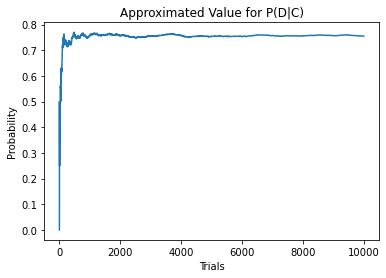

In [92]:
plt.plot(to_graph)
plt.title("Approximated Value for P(D|C)")
plt.xlabel("Trials")
plt.ylabel("Probability")
plt.show()

### Problem 4

In [ ]:
path = {"A":"hot","B":"cold","C":"cold","D":"hot","E":"cold","F":"cold"}
keys = list(path.keys())
X = []

for _ in range(0,10000):
    
    total_path = ["A"]
    index = 0
    
    while len(total_path) < 5:
        
        index += np.random.choice([1,0], p = [0.80,0.20])
        total_path.append(keys[index])

    if (path[total_path[0]] == "hot" and path[total_path[1]] == "cold" and 
    path[total_path[2]] == "cold"):
        X.append(total_path[-1])
        
for letter in keys:
    print(f"{letter}: {X.count(letter) / len(X)}")